In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/antonioskorin/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Inserciones

In [2]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
df_dv_id = pd.read_csv("dv_inserciones_id.csv")
df_dv_usr = pd.read_csv("dv_inserciones_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.463109  0.979258  1.325493  1.804822   
1      hashing_cerrado_lineal  0.415019  0.839072  1.257516  1.625883   
2  hashing_cerrado_cuadratico  0.418331  0.852240  1.192822  1.667253   
3       hashing_cerrado_doble  0.409143  0.867995  1.235175  1.664721   
4          std::unordered_map  0.448274  0.837910  1.267159  1.676762   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  2.230789  2.671863  3.095811  3.489562  3.953621  ...  4.881000  5.529338   
1  2.002000  2.424290  2.894961  3.289783  3.701686  ...  4.385545  4.828156   
2  2.014019  2.495494  2.931777  3.235106  3.617439  ...  4.330490  4.758600   
3  2.132026  2.498164  3.023345  3.393252  3.739726  ...  4.494079  5.041172   
4  2.029617  2.618811  3.046987  3.367303  3.685181  ...  4.889656  5.439040   

      13000     14000     15000     16000     17000     18000     19000  \
0  5.

In [3]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")

df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())


df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.463109    0.034779
1      hashing_cerrado_lineal        1000  0.415019    0.039168
2  hashing_cerrado_cuadratico        1000  0.418331    0.032026
3       hashing_cerrado_doble        1000  0.409143    0.048424
4          std::unordered_map        1000  0.448274    0.068682
                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.763728    0.125326
1      hashing_cerrado_lineal        1000  0.720280    0.130868
2  hashing_cerrado_cuadratico        1000  0.679820    0.050254
3       hashing_cerrado_doble        1000  0.902010    0.118995
4          std::unordered_map        1000  0.424591    0.046276


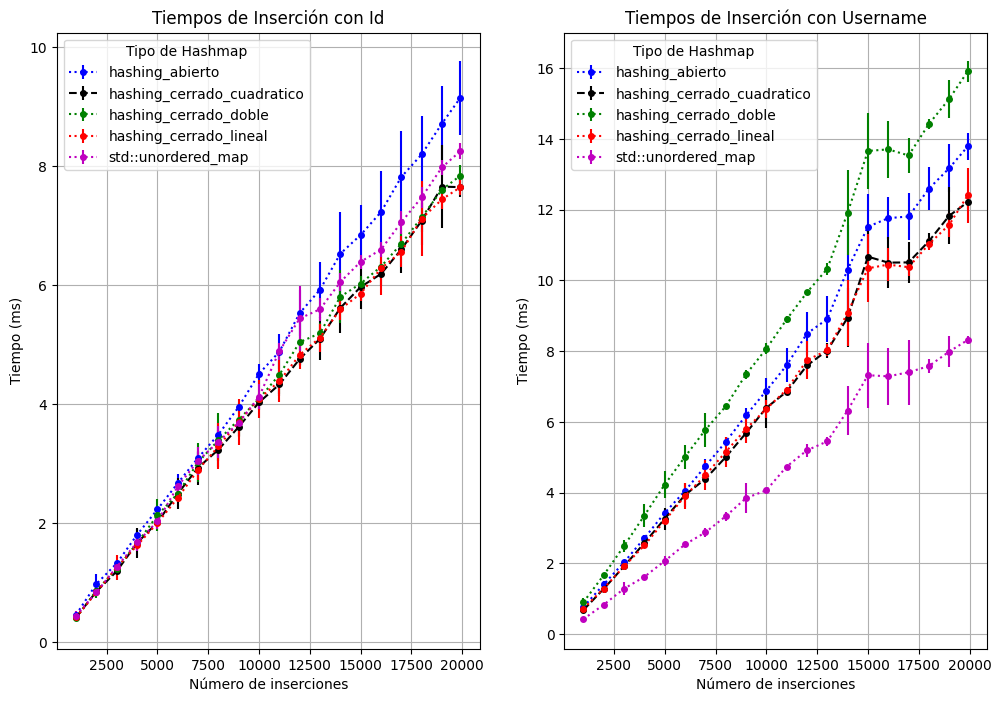

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.savefig("inserciones.png", bbox_inches="tight")
plt.show()


# Busquedas Tipo 1

In [5]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")
df_dv_id = pd.read_csv("dv_busquedas1_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.233661  0.438800  0.696615  0.911800   
1      hashing_cerrado_lineal  0.058779  0.109312  0.168226  0.222410   
2  hashing_cerrado_cuadratico  0.058343  0.109238  0.168546  0.223204   
3       hashing_cerrado_doble  0.067917  0.125796  0.201464  0.260719   
4          std::unordered_map  0.161674  0.306947  0.476939  0.630382   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  1.155600  1.433627  1.615430  1.884125  2.040980  ...  2.685116  2.922816   
1  0.276757  0.337832  0.400255  0.444763  0.498102  ...  0.619155  0.699128   
2  0.279345  0.338093  0.387405  0.445634  0.480897  ...  0.616834  0.669771   
3  0.330018  0.397896  0.456422  0.520335  0.564654  ...  0.725930  0.788950   
4  0.786553  0.996341  1.131120  1.334194  1.439807  ...  1.872134  2.057677   

      13000     14000     15000     16000     17000     18000     19000  \
0  3.

In [6]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())

df_id_melted["busquedas"] = df_id_melted["busquedas"].astype(int)
df_usr_melted["busquedas"] = df_usr_melted["busquedas"].astype(int)

                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.233661    0.022797
1      hashing_cerrado_lineal      1000  0.058779    0.000240
2  hashing_cerrado_cuadratico      1000  0.058343    0.001708
3       hashing_cerrado_doble      1000  0.067917    0.000594
4          std::unordered_map      1000  0.161674    0.025707
                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.450103    0.038213
1      hashing_cerrado_lineal      1000  0.240528    0.007995
2  hashing_cerrado_cuadratico      1000  0.240890    0.010950
3       hashing_cerrado_doble      1000  0.416193    0.009912
4          std::unordered_map      1000  0.188953    0.042359


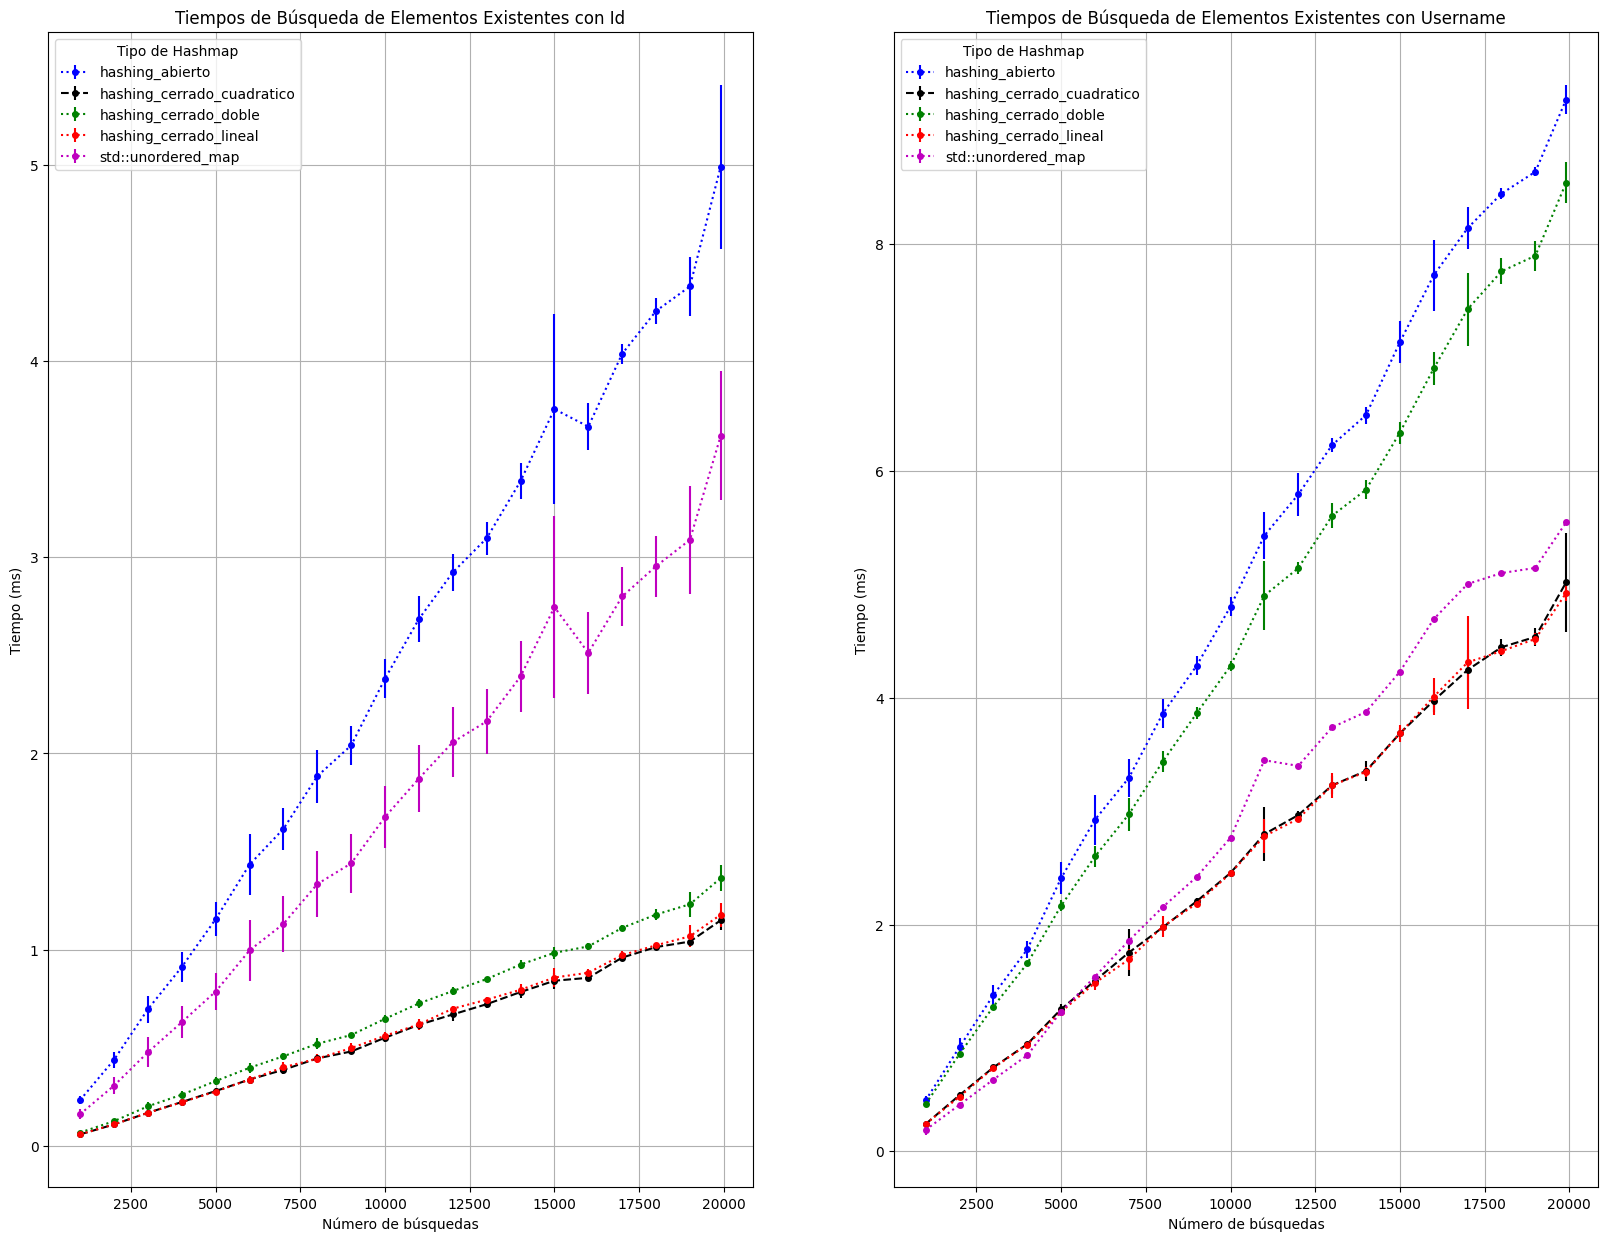

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i],yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.savefig("busquedas_1.png", bbox_inches="tight")
plt.show()

# Busquedas Tipo 2

In [8]:
df_id = pd.read_csv("busquedas2_id.csv")
df_usr = pd.read_csv("busquedas2_username.csv")
df_dv_id = pd.read_csv("dv_busquedas2_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas2_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  1.579997  1.514658  1.562124  1.757446   
1      hashing_cerrado_lineal  1.212570  1.150772  1.147878  1.161291   
2  hashing_cerrado_cuadratico  1.141186  1.113204  1.189772  1.133464   
3       hashing_cerrado_doble  1.362349  1.345107  1.285331  1.331975   
4          std::unordered_map  2.381851  2.426209  1.961314  2.342737   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  1.673140  1.688739  1.848752  1.796373  1.909674  ...  2.001435  2.091125   
1  1.121217  1.131531  1.115834  1.091353  1.132653  ...  1.117770  1.122857   
2  1.144594  1.112550  1.138849  1.070124  1.125457  ...  1.107936  1.118938   
3  1.299046  1.303984  1.387845  1.282534  1.334792  ...  1.314610  1.300661   
4  2.635405  2.034771  2.467605  2.368258  2.645762  ...  2.104777  2.269179   

      13000     14000     15000     16000     17000     18000     19000  \
0  2.

In [9]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())

df_id_melted["busquedas"] = df_id_melted["busquedas"].astype(int)
df_usr_melted["busquedas"] = df_usr_melted["busquedas"].astype(int)

                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  1.579997    0.227635
1      hashing_cerrado_lineal      1000  1.212570    0.223690
2  hashing_cerrado_cuadratico      1000  1.141186    0.049874
3       hashing_cerrado_doble      1000  1.362349    0.078438
4          std::unordered_map      1000  2.381851    0.185401
                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  5.143180    0.393044
1      hashing_cerrado_lineal      1000  4.681156    0.288392
2  hashing_cerrado_cuadratico      1000  4.663572    0.192828
3       hashing_cerrado_doble      1000  8.038332    0.321481
4          std::unordered_map      1000  2.217195    0.126311


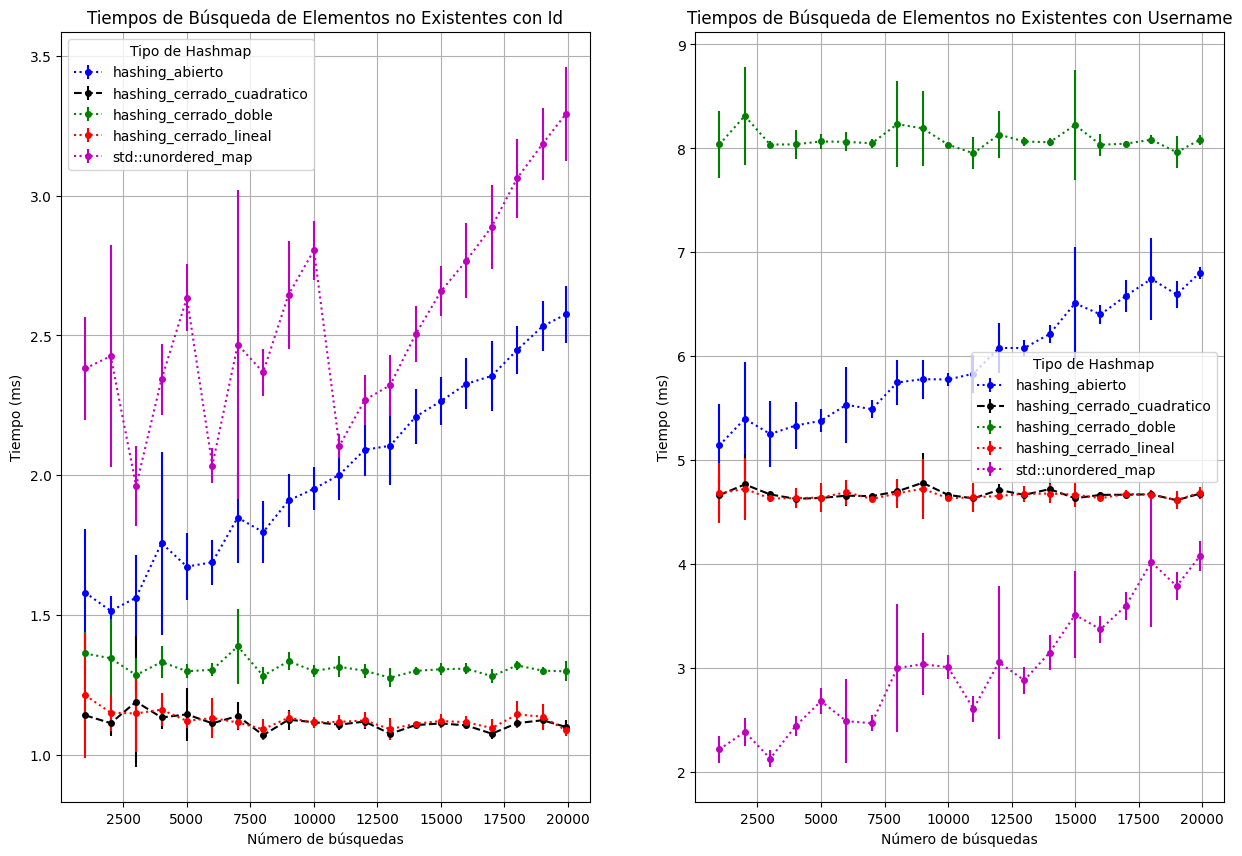

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))


styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1
    
for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos no Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos no Existentes con Username")

plt.savefig("busquedas_2.png", bbox_inches="tight")
plt.show()